# Analyzing the number of viruses associated with each host
###May 2017 | Gita Mahmoudabadi

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import ete3 as ete
import os
import Bio
import random
import scipy.stats as stats
from functools import *
from Bio import Entrez
from Bio import SeqIO
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_context("paper")
%matplotlib inline 


#as part of quality control the following viruses had to be omitted from our analysis
#they contain misannotations or mislabeled hosts, etc. 
badFolders = ['Acyrthosiphon_pisum_secondary_endosymbiont_phage_1_uid14047', 'Aureococcus_anophagefferens_virus_MM_2014_uid258005', 'Dragonfly_associated_microphage_1_uid177547', 'Enterobacter_phage_PG7_uid240014', 'Escherichia_phage_vB_EcoM_JS09_uid248321', 'Lactobacillus_phage_LL_H_uid19803', 'Providencia_phage_Redjac_uid177540', 'Pseudoalteromonas_phage_RIO_1_uid206039', 'Sputnik_virophage_2_uid243067', 'Sputnik_virophage_3_uid243065', 'Staphylococcus_phage_6ec_uid253318', 'Streptococcus_phage_DCC1738_uid253219', 'Streptococcus_phage_IC1_uid253220', 'Streptococcus_phage_K13_uid253223', 'Streptococcus_phage_SMP_uid18529', 'Vibrio_phage_CP_T1_uid181062', 'Vibrio_phage_vpms1_uid212709', 'Vibrio_phage_VPUSM_8_uid227006',  'Abaca_bunchy_top_virus_uid28697','Shallot_yellow_stripe_virus_uid15745','Equine_rhinitis_A_virus_uid15205','African_pouched_rat_arterivirus_uid274797','Spilanthes_yellow_vein_virus_uid19779', 'Velvet_bean_severe_mosaic_virus_uid41175','Paramecium_bursaria_Chlorella_virus_FR483_uid18305','Human_endogenous_retrovirus_K113_uid222261','Acholeplasma_phage_MV_L1_uid14573']
#viruses whose lineage is improperly annotated (they don't belong to any Baltimore group)
unknowns= ['Bacillus_phage_phBC6A51_uid15021', 'Bacillus_phage_phBC6A52_uid15022', 'Badger_feces_associated_gemycircularvirus_uid281125', 'Chaetoceros_DNA_virus_7_uid237558', 'Chaetoceros_lorenzianus_DNA_Virus_uid63565', 'Chaetoceros_tenuissimus_DNA_virus_uid60753', 'Cladosporium_cladosporioides_virus_1_uid258308', 'Enterobacteria_phage_YYZ_2008_uid32231', 'European_mountain_ash_ringspot_associated_virus_uid39973', 'Faecal_associated_gemycircularvirus_3_uid268557', 'Faecal_associated_gemycircularvirus_4_uid268556', 'Faecal_associated_gemycircularvirus_5_uid268555', 'Faecal_associated_gemycircularvirus_6_uid268554', 'Faecal_associated_gemycircularvirus_7_uid268553', 'Gentian_ovary_ring_spot_virus_uid256090', 'Geobacillus_virus_E2_uid19797', 'Glossina_pallidipes_salivary_gland_hypertrophy_virus_uid28839', 'Haloarcula_hispanica_icosahedral_virus_2_uid109269', 'Haloarcula_phage_SH1_uid15535', 'Halovirus_PH1_uid196975', 'Halovirus_VNH_1_uid262927', 'Human_genital_associated_circular_DNA_virus_1_uid281399', 'Lactobacillus_johnsonii_prophage_Lj771_uid28145', 'Magnaporthe_oryzae_RNA_virus_uid272442', 'Mongoose_feces_associated_gemycircularvirus_a_uid281407', 'Mongoose_feces_associated_gemycircularvirus_b_uid281406', 'Mongoose_feces_associated_gemycircularvirus_c_uid281404', 'Mongoose_feces_associated_gemycircularvirus_d_uid281405', 'Mycoplasma_phage_phiMFV1_uid14387', 'Penicillium_roqueforti_dsRNA_mycovirus_1_uid258162', 'Phage_Gifsy_1_uid32269', 'Phage_Gifsy_2_uid32271', 'Pigeonpea_cryptic_virus_uid244664', 'Planaria_asexual_strain_specific_virus_like_element_type_1_uid14140', 'Pseudomonas_phage_phi_Pto_bp6g_uid240724', 'Rhizoctonia_fumigata_mycovirus_uid283068', 'Rhodococcus_phage_REQ2_uid81171', 'Rhodococcus_phage_REQ3_uid81175', 'Rose_rosette_virus_uid64937', 'Rosellinia_necatrix_fusarivirus_1_uid255787', 'Rosellinia_necatrix_megabirnavirus_1_W779_uid41609', 'Salisaeta_icosahedral_phage_1_uid167575', 'Salmonella_phage_Fels_1_uid29267', 'Sodalis_phage_phiSG1_uid16583', 'Staphylococcus_phage_phi2958PVL_uid32173', 'Staphylococcus_phage_tp310_1_uid20659', 'Staphylococcus_phage_tp310_3_uid20663', 'Stenotrophomonas_phage_phiSMA9_uid15493', 'Streptococcus_phage_20617_uid239271', 'Streptococcus_phage_phiBHN167_uid227353', 'Streptococcus_pyogenes_phage_315_1_uid14533', 'Streptococcus_pyogenes_phage_315_2_uid14528', 'Streptococcus_pyogenes_phage_315_3_uid14529', 'Streptococcus_pyogenes_phage_315_4_uid14530', 'Streptococcus_pyogenes_phage_315_5_uid14531', 'Streptococcus_pyogenes_phage_315_6_uid14532', 'Tanay_virus_uid246129', 'Thermococcus_prieurii_virus_1_uid84407', 'Thermus_phage_IN93_uid14235', 'Thermus_phage_P23_77_uid40235']
badFolders=badFolders+unknowns
#these are satellite viruses 
sats = ['Ageratum_conyzoides_associated_symptomless_alphasatellite_uid259293', 'Ageratum_enation_alphasatellite_uid181994', 'Ageratum_leaf_curl_betasatellite_uid195929', 'Ageratum_leaf_curl_Cameroon_betasatellite_uid36669', 'Ageratum_yellow_leaf_curl_betasatellite_uid14439', 'Ageratum_yellow_vein_China_alphasatellite_uid237561', 'Ageratum_yellow_vein_China_virus_associated_DNA_beta_uid15515', 'Ageratum_yellow_vein_Singapore_alphasatellite_uid14232', 'Ageratum_yellow_vein_virus_satellite_DNA_beta_uid14444', 'Alternanthera_yellow_vein_virus_satellite_DNA_beta_uid19833', 'Andrographis_yellow_vein_leaf_curl_betasatellite_uid243492', 'Bhendi_yellow_vein_India_betasatellite__India_Aurangabad_OY164_2006__uid61557', 'Bhendi_yellow_vein_mosaic_betasatellite__India_Coimbator_OYCO1_2005__uid61777', 'Bhendi_yellow_vein_mosaic_virus_associated_alphasatellite_uid174781', 'Bhendi_yellow_vein_mosaic_virus_satellite_DNA_beta_uid14445', 'Black_medic_leafroll_alphasatellite_1_uid243500', 'Cardamom_bushy_dwarf_virus_satellite_uid230064', 'Cassava_mosaic_Madagascar_alphasatellite_uid175666', 'Chili_leaf_curl_Bhatinda_betasatellite_uid206467', 'Chilli_leaf_curl_alphasatellite_uid253224', 'Chilli_leaf_curl_Multan_alphasatellite_uid39933', 'Chilli_leaf_curl_virus_satellite_DNA_beta_uid14441', 'Cleome_leaf_crumple_virus_associated_DNA_1_uid60045', 'Corchorus_yellow_vein_mosaic_betasatellite_uid192608', 'Cotton_leaf_curl_Burewala_alphasatellite_uid45935', 'Cotton_leaf_curl_Burewala_betasatellite_uid45933', 'Cotton_leaf_curl_Gezira_alphasatellite_uid42507', 'Cotton_leaf_curl_Gezira_virus_satellite_DNA_beta_uid15166', 'Cotton_leaf_curl_Multan_betasatellite_uid15780', 'Cotton_leaf_curl_virus_associated_DNA_1_isolate_Lucknow_uid65305', 'Cotton_leaf_curl_virus_associated_DNA_beta_uid14438', 'Cotton_leaf_curl_virus_betasatellite_uid162497', 'Cowpea_severe_leaf_curl_associated_DNA_beta_uid15157', 'Croton_yellow_vein_mosaic_alphasatellite_uid45931', 'Croton_yellow_vein_mosaic_betasatellite_uid18249', 'Cuban_alphasatellite_1_uid210798', 'Dragonfly_associated_alphasatellite_uid181244', 'Emilia_yellow_vein_virus_associated_DNA_beta_uid37893', 'Erectites_yellow_mosaic_virus_satellite_DNA_beta_uid19827', 'Eupatorium_yellow_vein_virus_satellite_DNA_beta_uid14447', 'Faba_bean_necrotic_stunt_alphasatellite_1_uid243499', 'Faba_bean_necrotic_stunt_alphasatellite_2_uid243498', 'French_bean_leaf_curl_betasatellite_Kanpur_uid169556', 'Gossypium_darwinii_symptomless_alphasatellite_uid39593', 'Gossypium_davidsonii_symptomless_alphasatellite_uid39589', 'Gossypium_mustilinum_symptomless_alphasatellite_uid39591', 'Grapevine_satellite_virus_uid208539', 'Guar_leaf_curl_alphasatellite_uid193981', 'Hedyotis_uncinella_yellow_mosaic_betasatellite_uid230991', 'Honeysuckle_yellow_vein_mosaic_disease_associated_satellite_DNA_beta_uid19863', 'Honeysuckle_yellow_vein_mosaic_virus_satellite_DNA_beta_uid14620', 'Leucas_zeylanica_yellow_vein_virus_satellite_DNA_beta_uid41305', 'Ludwigia_leaf_distortion_betasatellite__India_Amadalavalasa_Hibiscus_2007__uid29233', 'Ludwigia_yellow_vein_virus_associated_DNA_beta_uid15561', 'Luffa_puckering_and_leaf_distortion_associated_betasatellite__India_Gurdaspur_Okra_2013__uid253218', 'Luffa_puckering_and_leaf_distortion_associated_DNA_beta_uid15779', 'Malachra_yellow_vein_mosaic_virus_associated_satellite_DNA_beta_uid28727', 'Malvastrum_leaf_curl_betasatellite_uid16301', 'Malvastrum_leaf_curl_Guangdong_betasatellite_uid243827', 'Malvastrum_yellow_vein_Yunnan_virus_satellite_DNA_beta_uid14567', 'Melon_chlorotic_mosaic_virus_associated_alphasatellite_uid51413', 'Mesta_yellow_vein_mosaic_virus_alphasatellite__India_Hoshiarpur_Okra_2013__uid253217', 'Mesta_yellow_vein_mosaic_virus_associated_alphasatellite_uid174780', 'Mesta_yellow_vein_mosaic_virus_associated_DNA_beta_uid21015', 'Milk_vetch_dwarf_C10_alphasatellite_uid240682', 'Mirabilis_leaf_curl_India_virus_associated_betasatellite_uid255800', 'Mungbean_yellow_mosaic_India_virus_associated_betasatellite__India__Faizabad__Cow_Pea_2012__uid177773', 'Nanovirus_like_particle_uid14386', 'Okra_enation_leaf_curl_betasatellite__India_Sonipat_EL10_2006__uid61781', 'Okra_leaf_curl_Mali_virus_satellite_DNA_beta_uid20323', 'Okra_yellow_vein_disease_associated_sequence_uid14443', 'Olive_viral_satellite_RNA_uid230268', 'Papaya_leaf_curl_alphasatellite_uid233414', 'Papaya_leaf_curl_China_virus_satellite_DNA_beta_uid19819', 'Pepper_leaf_curl_virus_satellite_DNA_beta_uid28283', 'Pepper_leaf_curl_Yunnan_virus_satellite_DNA_beta_uid29415', 'Potato_apical_leaf_curl_disease_associated_satellite_DNA_beta_uid18323', 'Radish_leaf_curl_virus_betasatellite_uid28281', 'Sida_leaf_curl_virus_satellite_DNA_beta_uid19823', 'Sida_yellow_mosaic_virus_China_associated_DNA_beta_uid15514', 'Sida_yellow_vein_China_alphasatellite_uid238950', 'Siegesbeckia_yellow_vein_virus_associated_DNA_beta_uid17269', 'Subterranean_clover_stunt_C6_alphasatellite_uid14180', 'Synedrella_leaf_curl_alphasatellite_uid263034', 'Tobacco_leaf_chlorosis_betasatellite_uid178075', 'Tobacco_leaf_curl_disease_associated_sequence_uid14442', 'Tobacco_leaf_curl_PUSA_alphasatellite_uid56023', 'Tobacco_leaf_curl_virus_associated_DNA_beta_uid45925', 'Tomato_leaf_curl_Bangladesh_betasatellite_uid56017', 'Tomato_leaf_curl_Gandhinagar_betasatellite_uid231683', 'Tomato_leaf_curl_Hajipur_betasatellite_uid175587', 'Tomato_leaf_curl_Joydebpur_virus_satellite_DNA_beta_uid28273', 'Tomato_leaf_curl_Karnataka_alphasatellite_uid181995', 'Tomato_leaf_curl_Pakistan_virus_associated_DNA_1_uid38463', 'Tomato_leaf_curl_Patna_betasatellite_uid36541', 'Tomato_leaf_curl_Togo_betasatellite_Togo_2006__uid60629', 'Tomato_leaf_curl_Yemen_betasatellite_uid177643', 'Tomato_yellow_leaf_curl_China_betasatellite_uid181248', 'Tomato_yellow_leaf_curl_Vietnam_virus_satellite_DNA_beta_uid19829', 'TYLCCNV_Y322__satellite_DNA_beta_uid16338', 'Vernonia_yellow_vein_betasatellite_uid41303', 'Vernonia_yellow_vein_Fujian_virus_alphasatellite_uid72145', 'Vernonia_yellow_vein_Fujian_virus_betasatellite_uid72143', 'Zinnia_leaf_curl_disease_associated_sequence_uid14440', 'Zinnia_leaf_curl_virus_associated_DNA_beta_uid14538']


def getTaxidFromGenomeFolder(genome_folder):
    '''
    Takes an rpt file for a genome and returns the taxid in it.
    '''   
    if folder not in badFolders and folder not in sats:
        with open(os.path.join('all_rpt', folder, os.listdir(os.path.join('all_rpt', folder))[0])) as rpt_file:
            for line in rpt_file:
                if line.startswith('Taxid: '):
                    return int(line[7:-1])
                

def getHostTaxidFromGenomeFolder(genome_folder):
    '''
    Takes a folder containing an asn file and returns the taxid of the host of
    the virus described by that asn file.
    '''
    if folder not in badFolders and folder not in sats :
        with open('folderToHostTaxid.txt', 'r') as taxid2host:
            for line in taxid2host:
                if genome_folder in line:
                    return int(line.split('\t')[1][:-1])
        return 0
    

def getGenomeLengthFromGenomeFolder(genome_folder):
    total = 0
    if folder not in badFolders and folder not in sats :
        for file in os.listdir(os.path.join('all_ptt', folder)):
            with open(os.path.join('all_ptt', folder, file)) as ptt_file:
                line = ptt_file.readline()
                index = line.find('- 1..')
                if index == -1:
                    return -1
                num = line[index + 5 : -1]
                total += int(num)
        return total
    

def getCodingNumberAndOverlapNumberFromGenomeFolder(folder):
    totalCoding = 0
    totalOverlap = 0
    for file in os.listdir(os.path.join('all_ptt', folder)):
        #these folders contain genomes with misannotation of gene overlap,non-coding DNA, or host information from NCBI. 
        if folder not in badFolders and folder not in sats : 
            with open(os.path.join('all_ptt', folder, file)) as ptt_file:
                line = ptt_file.readline()
                index = line.find('- 1..')
                repliconLength = int(line[index + 5 : -1])
                indicesThatOverlap = [0] * repliconLength
                line = ptt_file.readline()
                line = ptt_file.readline()

                uniqueIndices = set([])
                for line in ptt_file:
                    line = line.split('\t')[0]
                    [start, end] = [int(x) for x in line.split('..')]
                    #this is put in place to distinguish linear from circular genomes. Here, we're looking for linear genomes
                    if start < end:                    
                        for i in range(start, end):
                            if i in uniqueIndices:
                                indicesThatOverlap[i] = 1
                            else:
                                uniqueIndices.add(i)
                    #here were are looking for circular genomes to be able to properly count noncoding bases
                    elif start > end:
                        for i in range(start, repliconLength):
                            if i in uniqueIndices:
                                indicesThatOverlap[i] = 1
                            else:
                                uniqueIndices.add(i)
                        for i in range(1, end):
                            if i in uniqueIndices:
                                indicesThatOverlap[i] = 1
                            else:
                                uniqueIndices.add(i)
                           
                totalCoding += len(uniqueIndices)
                #totalOverlap += len(bigList) - len(uniqueIndices)
                totalOverlap += sum(indicesThatOverlap)
    return (totalCoding, totalOverlap)
   
genomeLengths = []
lengthData = []
counter = 0
length_lists = []
hostTaxidList = []
taxidList = []
folders = []
dbObject = ete.NCBITaxa()

for folder in os.listdir('all_faa'):
    #these entries had problems with their gene overlap, protein, and noncoding annotation, need to be excluded    
    if folder not in badFolders and folder not in sats :   
        length_lists.append([])
        for fileName in os.listdir(os.path.join('all_faa', folder)):
            with open(os.path.join('all_faa', folder, fileName), "r") as faa_file:
                proteins = SeqIO.parse(faa_file, 'fasta')
                for protein in proteins:
                    length_lists[counter].append(float(len(protein.seq)))

        hostTaxid = getHostTaxidFromGenomeFolder(folder)
        # viruses with unidentified hosts. Now they are out. 
        if hostTaxid and hostTaxid != 11086 and hostTaxid != 10036 and hostTaxid != 37965 and hostTaxid != 10640  and hostTaxid != 32644 and hostTaxid != 1 and hostTaxid != 212035 and hostTaxid != 1051671:
            taxidList.append(getTaxidFromGenomeFolder(folder))
            hostTaxidList.append(hostTaxid)
            genomeLengths.append(getGenomeLengthFromGenomeFolder(folder))
            folders.append(folder)
            counter += 1
        else:
            length_lists = length_lists[:-1]

        if counter % 100 == 0:
            print(str(int(np.round(float(counter) * 100.0 / 2701.0))) + '% done.')

taxidLineages = [dbObject.get_lineage(t) for t in taxidList]
englishLineages = [[str(rank) for rank in dbObject.translate_to_names(lin)]
                   for lin in taxidLineages]
hostTaxidLineages = [dbObject.get_lineage(t) for t in hostTaxidList]
hostEnglishLineages = [[str(rank) for rank in dbObject.translate_to_names(lin)] 
                       for lin in hostTaxidLineages]

for i in range(len(length_lists)):
    lengthData.append({'length_list' : length_lists[i],
                       'taxid' : taxidList[i],
                       'hostTaxid' : hostTaxidList[i],
                       'englishLineage' : englishLineages[i],
                       'taxidLineage' : taxidLineages[i],
                       'hostEnglishLineage' : hostEnglishLineages[i],
                       'hostTaxidLineage' : hostTaxidLineages[i],
                       'mean' : np.mean(length_lists[i]),
                       'std' : np.std(length_lists[i]),
                       'median' : np.median(length_lists[i]),
                       'numProteins' : len(length_lists[i]),
                       'genomeLength' : genomeLengths[i],
                       'folder' : folders[i]})
                       
lengthData = [virus for virus in lengthData if virus['genomeLength'] != -1]



4% done.
4% done.
7% done.
11% done.
15% done.
19% done.
22% done.
26% done.
30% done.
33% done.
33% done.
37% done.
41% done.
44% done.
48% done.
52% done.
56% done.
59% done.
59% done.
63% done.
67% done.
67% done.
70% done.
70% done.
74% done.
78% done.
78% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
85% done.
89% done.
89% done.


/Users/Gita/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


###Virus-host histogram for bacterial viruses

the outliers are:  [['Lactococcus lactis', 22], ['Escherichia coli', 74], ['Ralstonia solanacearum', 12], ['Enterococcus faecalis', 12], ['Cronobacter sakazakii', 11], ['Salmonella enterica subsp. enterica serovar Typhimurium', 13], ['Mycobacterium smegmatis', 12], ['Staphylococcus aureus', 62], ['Listeria monocytogenes', 17], ['Salmonella enterica', 11], ['Pseudomonas aeruginosa', 51], ['Propionibacterium acnes', 21], ['Cellulophaga baltica', 17], ['Streptococcus thermophilus', 13], ['Vibrio cholerae', 15]]
total number of bacterial hosts: 900
median number of viruses associated with a host species 1.0
mean number of viruses associated with a host species 3.23741007194


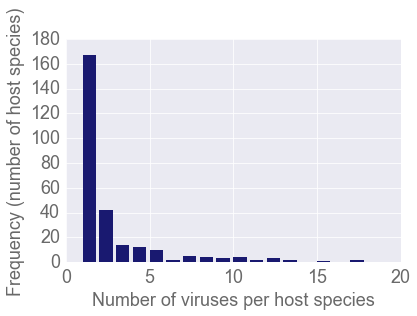

In [61]:
#unfortunately, the last entry in the host lineage is a combination of host species, strains, and sometimes genus names. Hence, I had to clean up the list by hand for bacteria and had to exclude these viruses from this analysis. 
#these are the viruses (badEntries) whose hosts are not identified all the way down to species
badEntries=['Streptomyces','Phormidium','Pseudomonas','Spiroplasma','Listeria','Salmonella','Nitrincola','Dickeya','Marinomonas','Enterobacteriaceae','Lactobacillus','Roseobacter','Vibrio','Nonlabens','Lactococcus','Escherichia','Mycobacterium','Parvimonas','Pseudoalteromonas','Escherichia coli O157']
allViruses= [virus['hostEnglishLineage'][-1] for virus in lengthData if "Bacteria" in virus['hostEnglishLineage'] and virus['hostEnglishLineage'][-1] not in badEntries]
new=[[x, allViruses.count(x)] for x in set(allViruses)]
outliers = [x for x in new if x[1]>10]
print('the outliers are: ', outliers)
allcounts = [p[1] for p in new]
countsAndFreqs =[[x, allcounts.count(x)] for x in set(allcounts)]
counts = [x[0] for x in countsAndFreqs]
freqs = [x[1] for x in countsAndFreqs]
plt.bar(counts, freqs, color='midnightBlue', linewidth=0)
plt.tick_params(axis='both', which='both', labelsize=18, labelcolor = 'dimgrey', color='dimgrey')
plt.xlabel('Number of viruses per host species', fontsize = 18, color='dimgrey')
plt.ylabel('Frequency (number of host species)', fontsize = 18, color='dimgrey')
#number of hosts for which we know the host species information
tot=np.sum([x*y for x,y in zip(counts,freqs)])
#calculating the fraction of unique host species associated with a virome, len(new) gives the number of unique species
#f=len(new)/tot
print('total number of bacterial hosts:', tot)
#print('fraction of host species with only one known virus', f)
#mean and median of the distribution
print('median number of viruses associated with a host species', np.median(np.sort(allcounts)))
print('mean number of viruses associated with a host species', np.mean(allcounts))
plt.xlim(0,20)
#just added to be able to perserve text when taking the plot image into illustrator version 6
plt.savefig('virusHostHistBact-shortRange.pdf')
#plt.savefig('virusHostHistBact-LongRange.pdf')
plt.rcParams['pdf.fonttype'] = 42
plt.show()

###Exploring the viruses associated biased host species
Hosts with >20 known viruses

In [11]:
x = [virus['englishLineage'] for virus in lengthData if 'Staphylococcus aureus' in virus['hostEnglishLineage']]
#print(x)

z = [virus['englishLineage'] for virus in lengthData if 'Solanum lycopersicum' in virus['hostEnglishLineage']]
#print(z)

y = [virus['englishLineage'] for virus in lengthData if 'Escherichia coli' in virus['hostEnglishLineage']]
print(y)


[['root', 'Viruses', 'dsDNA viruses, no RNA stage', 'Caudovirales', 'Podoviridae', 'N4likevirus', 'unclassified N4likevirus', 'Enterobacter phage IME11'], ['root', 'Viruses', 'dsDNA viruses, no RNA stage', 'Caudovirales', 'Podoviridae', 'Autographivirinae', 'T7likevirus', 'unclassified T7-like viruses', 'Enterobacteria phage 13a'], ['root', 'Viruses', 'dsDNA viruses, no RNA stage', 'Caudovirales', 'Podoviridae', 'Autographivirinae', 'T7likevirus', 'unclassified T7-like viruses', 'Enterobacteria phage 285P'], ['root', 'Viruses', 'dsDNA viruses, no RNA stage', 'Caudovirales', 'Myoviridae', 'Tevenvirinae', 'T4likevirus', 'unclassified T4-like viruses', 'Enterobacteria phage GEC-3S'], ['root', 'Viruses', 'dsDNA viruses, no RNA stage', 'Caudovirales', 'Podoviridae', 'unclassified Podoviridae', 'Enterobacteria phage 933W sensu lato', 'Enterobacteria phage 933W'], ['root', 'Viruses', 'dsDNA viruses, no RNA stage', 'Caudovirales', 'Siphoviridae', 'unclassified Siphoviridae', 'Enterobacteria ph

###Virus-host histogram for archaeal viruses


42
median:  1.0
mean:  1.35483870968


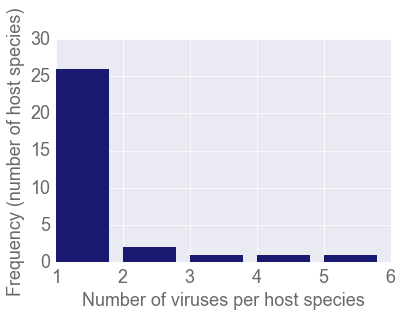

In [54]:
#Similar to the bacterial case, some viral entries had to be excluded due to incomplete host lineage information. 
badEntries=['Sulfolobus','Acidianus','Halorubrum']
allViruses= [virus['hostEnglishLineage'][-1] for virus in lengthData if "Archaea" in virus['hostEnglishLineage'] and virus['hostEnglishLineage'][-1] not in badEntries]
newArch=[[x, allViruses.count(x)] for x in set(allViruses)]
allcounts = [p[1] for p in newArch]
countsAndFreqs =[[x, allcounts.count(x)] for x in set(allcounts)]
counts = [x[0] for x in countsAndFreqs]
freqs = [x[1] for x in countsAndFreqs]
plt.bar(counts, freqs, color='midnightBlue', linewidth=0)
plt.tick_params(axis='both', which='both', labelsize=18, labelcolor = 'dimgrey', color='dimgrey') 
plt.xlabel('Number of viruses per host species', fontsize = 18, color='dimgrey')
plt.ylabel('Frequency (number of host species)', fontsize = 18, color='dimgrey')
#number of hosts for which we know the host species information
tot=np.sum([x*y for x,y in zip(counts,freqs)])
print(tot)
#calculating the fraction of unique host species associated with a virome, len(new) gives the number of unique species, excluding those hosts with un-identified species level classification
#f=len(newArch)/tot
#print('fraction of hosts with one known virus: ', f)
#mean and median of the distribution
print('median: ', str(np.median(np.sort(allcounts))))
print('mean: ', str(np.mean(allcounts)))

#plt.xlim(0,20)
#just added to be able to perserve text when taking the plot image into illustrator version 6

#plt.savefig('virusHostHistArchs-shortRange.pdf')
plt.savefig('virusHostHistArch-LongRange.pdf')
plt.rcParams['pdf.fonttype'] = 42
plt.show()

###Virus-host histogram for eukaryotic viruses

[['Solanum lycopersicum', 65], ['Homo sapiens', 104], ['Sus scrofa', 39], ['Bos taurus', 23], ['Gallus gallus', 23]]
total number of bacterial hosts: 1281
median number of viruses associated with a host species 1.0
mean number of viruses associated with a host species 2.15294117647


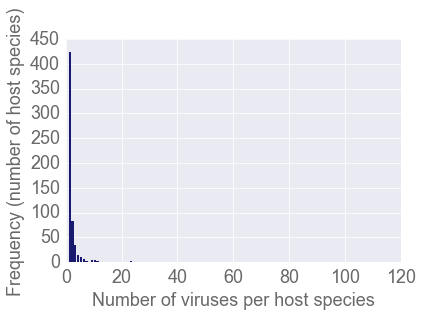

In [60]:
#unfortunately, the last entry in the host lineage is a combination of host species, strains, and sometimes genus names. Hence, I had to clean up the list by hand for eukaryotes. 
badEntries=['Wissadula','Dalechampia','Panthera','Equus','Wisteria','Luffa','Rubus','Narcissus','Avena','Apache','Formicidae','Peristrophe','Calibrachoa','Citrus','Iso','Hea','Delphinium','Embryophyta','Melo','Agapanthus','Abutilon','Centrosema','Hibiscus','Zantedeschia','Ara','Channa','Peridroma','Saccharum','Odo','Fragaria','Coelacanthimorpha','Hero','Diuris','Macroptilium','Solanum','Brugmansia','Psorophora','Amoeba','Rheum','Aedes','Pedunculata','Culex','Verbena','Ochlerotatus',"Ostreococcus 'lucimarinus'",'Cercopithecidae','Lutzomyia','Sida','Hemileuca','Meridion','Epinotia','Apodemus','Uranotaenia','Micrantha','Pera','Cervidae','Culicoides','Hylocereus','Allium','Capsicum','Dichopogon','Lonicera','Furcraea','Amblyomma','Rhynchosia','Ixodida','Jatropha','Desmodium','Chaerephon','Acanthamoeba','Bathycoccus','Cleome','Chrysanthemum','Hylomyscus']
allViruses= [virus['hostEnglishLineage'][-1] for virus in lengthData if "Eukaryota" in virus['hostEnglishLineage'] and virus['hostEnglishLineage'][-1] not in badEntries]
newEuk=[[x, allViruses.count(x)] for x in set(allViruses)]
outliers = [x for x in newEuk if x[1]>20]
print(outliers)
allcounts = [p[1] for p in newEuk]
countsAndFreqs =[[x, allcounts.count(x)] for x in set(allcounts)]
counts = [x[0] for x in countsAndFreqs]
freqs = [x[1] for x in countsAndFreqs]
plt.bar(counts, freqs, color='midnightBlue', linewidth=0)
plt.tick_params(axis='both', which='both', labelsize=18, labelcolor = 'dimgrey', color='dimgrey') 
plt.xlabel('Number of viruses per host species', fontsize = 18, color='dimgrey')
plt.ylabel('Frequency (number of host species)', fontsize = 18, color='dimgrey')
#number of hosts for which we know the host species information
tot=np.sum([x*y for x,y in zip(counts,freqs)])
#calculating the fraction of unique host species associated with a virome, len(new) gives the number of unique species, excluding those hosts with un-identified species level classification
#f=len(newEuk)/tot
#print(f)
#mean and median of the distribution
print('total number of bacterial hosts:', tot)
#mean and median of the distribution
print('median number of viruses associated with a host species', np.median(np.sort(allcounts)))
print('mean number of viruses associated with a host species', np.mean(allcounts))

#plt.xlim(0,20)
#just added to be able to perserve text when taking the plot image into illustrator version 6
#plt.savefig('virusHostHistEuks-shortRange.pdf')
plt.savefig('virusHostHistEuk-LongRange.pdf')
plt.rcParams['pdf.fonttype'] = 42
plt.show()

In [14]:
#To display the Opisthokonta sub categories and the number of associated viruses
aa = [virus['hostEnglishLineage'][6] for virus in lengthData if 'Metazoa' in virus['hostEnglishLineage']]
bb =[[x,aa.count(x)] for x in set(aa)]
print(bb)
cc = [virus['hostEnglishLineage'][6] for virus in lengthData if 'Fungi' in virus['hostEnglishLineage']]
dd =[[x,cc.count(x)] for x in set(cc)]
print(dd)

[['Bilateria', 765]]
[['Basidiomycota', 6], ['Ascomycota', 63]]


In [15]:
#To display the Opisthokonta categories and the number of associated viruses
aa = [virus['hostEnglishLineage'][5] for virus in lengthData if 'Opisthokonta' in virus['hostEnglishLineage']]
bb =[[x,aa.count(x)] for x in set(aa)]
print(bb)

[['Eumetazoa', 765], ['Dikarya', 69]]
